#  Data Processing

Reproduce results of our [AAAI paper](http://www.cs.iit.edu/~culotta/pubs/culotta15predicting.pdf).

This notebook assumes the data is in place. You can get data either by running [data_collection.ipynb](https://github.com/tapilab/aaai-2015-demographics/blob/master/src/data_collection.ipynb)
or by running the next cell, which downloads it.

In [2]:
# Download Twitter data from server if not already present.
import os
import urllib

for fname in ['username2brand.pkl', 'brand2counts.pkl', 'id2brand.pkl', 'brands.json']:
    if not os.path.isfile('../data/' + fname):
        url = 'http://tapi.cs.iit.edu/data/aaai-2015-demographics/originals/' + fname
        print('downloading %s to %s' % (url, '../data/' + fname))
        urllib.urlretrieve(url, "../data/" + fname)
    else:
        print(fname + 'already exists.')

username2brand.pklalready exists.
brand2counts.pklalready exists.
id2brand.pklalready exists.
brands.jsonalready exists.


In [3]:
# Unpickle everything
import pickle
id2brand = pickle.load(open('../data/id2brand.pkl', 'rb'))
brand2counts = pickle.load(open('../data/brand2counts.pkl', 'rb'))
username2brand = pickle.load(open('../data/username2brand.pkl', 'rb'))

total friend links: 177997246.0


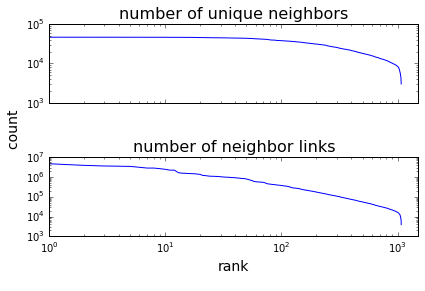

In [5]:
import numpy as np

# Plot descriptive stats of the data.
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data_figs():
    figure, axes = plt.subplots(2, 1, sharex=True)
    unique_friends = sorted([len(d.keys()) for d in brand2counts.values()], reverse=True)
    axes[0].plot(unique_friends)
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    axes[0].set_title('number of unique neighbors', size=16)

    brcounts = sorted([sum(d.values()) for d in brand2counts.values()], reverse=True)
    print('total friend links:', sum(brcounts))
    axes[1].plot(brcounts)
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    axes[1].set_title('number of neighbor links', size=16)
    axes[1].set_xlim((0,1500))
    axes[1].set_xlabel('rank', size=14)
    axes[1].set_ylabel(' ' * 30 + 'count', size=14)
    figure.tight_layout()
    plt.savefig('data.pdf', bbox_inches='tight')

plot_data_figs()

In [31]:
# Normalize data and create sparse matrix.
import numpy as np
from numpy import array as npa
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import scale

brand_ids = npa(list(brand2counts.keys()))
vec = DictVectorizer()
X = vec.fit_transform(brand2counts.values())
print('The feature vector for one brand looks like this:\n%s' % str(X[0]))

The feature vector for one brand looks like this:
  (0, 0)	20.0
  (0, 1)	15.0
  (0, 2)	18.0
  (0, 4)	1.0
  (0, 5)	3.0
  (0, 6)	3.0
  (0, 9)	3.0
  (0, 10)	1.0
  (0, 11)	8.0
  (0, 13)	6.0
  (0, 14)	5.0
  (0, 15)	3.0
  (0, 17)	6.0
  (0, 18)	3.0
  (0, 19)	1.0
  (0, 20)	1.0
  (0, 24)	3.0
  (0, 26)	16.0
  (0, 27)	2.0
  (0, 28)	1.0
  (0, 29)	2.0
  (0, 31)	3.0
  (0, 32)	1.0
  (0, 33)	1.0
  (0, 34)	4.0
  :	:
  (0, 46553)	5.0
  (0, 46554)	1.0
  (0, 46555)	18.0
  (0, 46556)	3.0
  (0, 46559)	1.0
  (0, 46562)	4.0
  (0, 46565)	3.0
  (0, 46567)	2.0
  (0, 46568)	4.0
  (0, 46573)	1.0
  (0, 46577)	1.0
  (0, 46580)	2.0
  (0, 46583)	8.0
  (0, 46584)	2.0
  (0, 46587)	1.0
  (0, 46592)	1.0
  (0, 46604)	3.0
  (0, 46613)	1.0
  (0, 46618)	1.0
  (0, 46621)	3.0
  (0, 46622)	4.0
  (0, 46631)	3.0
  (0, 46640)	2.0
  (0, 46642)	1.0
  (0, 46648)	2.0


In [32]:
# Normalize by row.
from sklearn.preprocessing import normalize
print('%d total friend links' % X.sum())
X = normalize(X, norm='l1', axis=1)
print('The normalized feature vector for one brand looks like this:\n%s' % str(X[0]))

177997246 total friend links
The normalized feature vector for one brand looks like this:
  (0, 0)	0.000156586416128
  (0, 1)	0.000117439812096
  (0, 2)	0.000140927774516
  (0, 4)	7.82932080642e-06
  (0, 5)	2.34879624193e-05
  (0, 6)	2.34879624193e-05
  (0, 9)	2.34879624193e-05
  (0, 10)	7.82932080642e-06
  (0, 11)	6.26345664514e-05
  (0, 13)	4.69759248385e-05
  (0, 14)	3.91466040321e-05
  (0, 15)	2.34879624193e-05
  (0, 17)	4.69759248385e-05
  (0, 18)	2.34879624193e-05
  (0, 19)	7.82932080642e-06
  (0, 20)	7.82932080642e-06
  (0, 24)	2.34879624193e-05
  (0, 26)	0.000125269132903
  (0, 27)	1.56586416128e-05
  (0, 28)	7.82932080642e-06
  (0, 29)	1.56586416128e-05
  (0, 31)	2.34879624193e-05
  (0, 32)	7.82932080642e-06
  (0, 33)	7.82932080642e-06
  (0, 34)	3.13172832257e-05
  :	:
  (0, 46553)	3.91466040321e-05
  (0, 46554)	7.82932080642e-06
  (0, 46555)	0.000140927774516
  (0, 46556)	2.34879624193e-05
  (0, 46559)	7.82932080642e-06
  (0, 46562)	3.13172832257e-05
  (0, 46565)	2.3487962419

predicting ['No Kids', 'Has Kids'] for 1051 brands


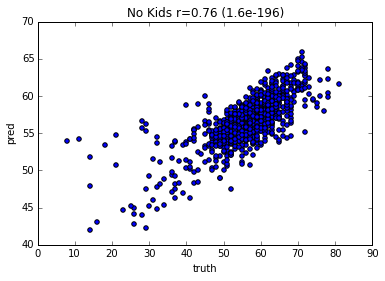

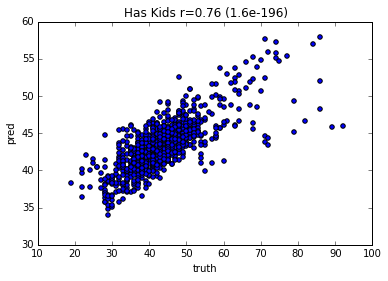

Top Coefficients for No Kids
pos:14677919 (1.4e+02) 16303106 (97) 807095 (96) 5988062 (95) 1344951 (88) 22027186 (84) 14075928 (81) 158414847 (81) 16129920 (80) 15164565 (79)
neg:29730065 (-1.5e+02) 18784113 (-1.5e+02) 15846407 (-1.3e+02) 14709355 (-1.2e+02) 16581734 (-1.2e+02) 94919897 (-1.1e+02) 16492009 (-1.1e+02) 106837463 (-1.1e+02) 16310534 (-1.1e+02) 36782022 (-1.1e+02)
Top Coefficients for Has Kids
pos:29730065 (1.5e+02) 18784113 (1.5e+02) 15846407 (1.3e+02) 14709355 (1.2e+02) 16581734 (1.2e+02) 94919897 (1.1e+02) 16492009 (1.1e+02) 106837463 (1.1e+02) 16310534 (1.1e+02) 36782022 (1.1e+02)
neg:14677919 (-1.4e+02) 16303106 (-97) 807095 (-96) 5988062 (-95) 1344951 (-88) 22027186 (-84) 14075928 (-81) 158414847 (-81) 16129920 (-80) 15164565 (-79)
predicting ['Male', 'Female'] for 1066 brands


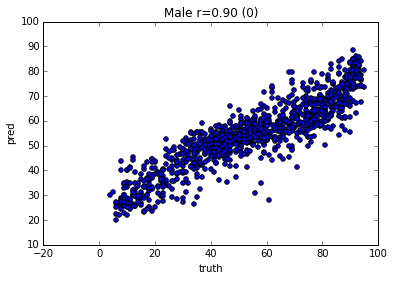

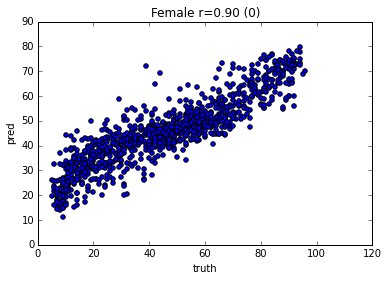

Top Coefficients for Male
pos:51263592 (3.6e+02) 26257166 (3e+02) 2557521 (2.8e+02) 1344951 (2.6e+02) 28870086 (2.5e+02) 10671602 (2.4e+02) 32765534 (2.3e+02) 36362259 (2.2e+02) 18927441 (2.2e+02) 19426551 (2.1e+02)
neg:15846407 (-6.3e+02) 19397785 (-5.5e+02) 21324258 (-4e+02) 106837463 (-3.7e+02) 20710809 (-3.5e+02) 15131310 (-3.4e+02) 11522502 (-3.2e+02) 38531995 (-3.2e+02) 25589776 (-3.1e+02) 25087685 (-3e+02)
Top Coefficients for Female
pos:15846407 (6.3e+02) 19397785 (5.5e+02) 21324258 (4e+02) 106837463 (3.7e+02) 20710809 (3.5e+02) 15131310 (3.4e+02) 11522502 (3.2e+02) 38531995 (3.2e+02) 25589776 (3.1e+02) 25087685 (3e+02)
neg:51263592 (-3.6e+02) 26257166 (-3e+02) 2557521 (-2.8e+02) 1344951 (-2.6e+02) 28870086 (-2.5e+02) 10671602 (-2.4e+02) 32765534 (-2.3e+02) 36362259 (-2.2e+02) 18927441 (-2.2e+02) 19426551 (-2.1e+02)
predicting ['No College', 'College', 'Grad School'] for 1046 brands


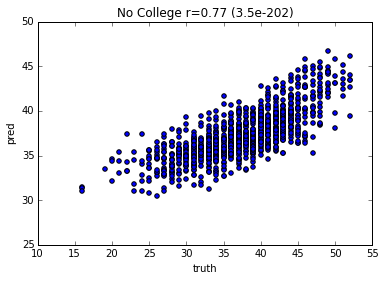

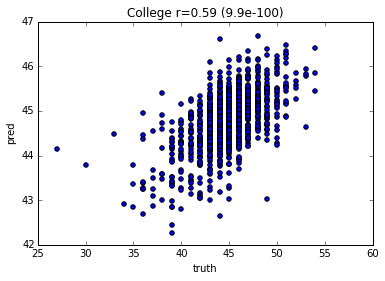

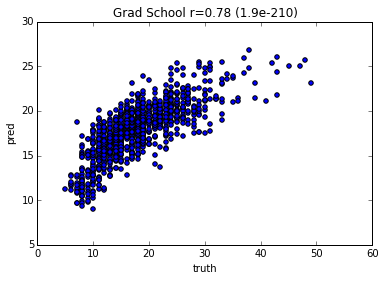

Top Coefficients for No College
pos:10228272 (1.2e+02) 10671602 (75) 29758446 (68) 21447363 (68) 23151437 (64) 24742040 (63) 18927441 (60) 180505807 (57) 17919972 (56) 15234657 (55)
neg:14677919 (-1.1e+02) 16303106 (-1e+02) 5988062 (-95) 807095 (-91) 3108351 (-89) 16017475 (-85) 2735591 (-81) 1344951 (-81) 972651 (-80) 158414847 (-75)
Top Coefficients for College
pos:115485051 (35) 22027186 (26) 25521487 (25) 6480682 (25) 1344951 (23) 36686415 (23) 15485441 (22) 66561957 (22) 972651 (20) 90420314 (20)
neg:2467791 (-43) 30313925 (-38) 807095 (-29) 813286 (-29) 3108351 (-27) 500704345 (-27) 9300262 (-26) 759251 (-25) 17006157 (-23) 51241574 (-22)
Top Coefficients for Grad School
pos:14677919 (1.3e+02) 807095 (1.2e+02) 5988062 (1.2e+02) 3108351 (1.2e+02) 2467791 (1.1e+02) 16017475 (1e+02) 16303106 (90) 5392522 (89) 1339835893 (88) 15164565 (85)
neg:10228272 (-1.1e+02) 21447363 (-74) 10671602 (-68) 180505807 (-66) 23151437 (-65) 29758446 (-59) 18927441 (-59) 24742040 (-58) 17919972 (-57) 5

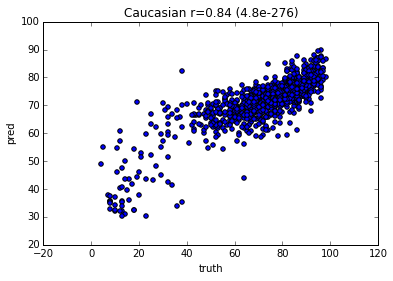

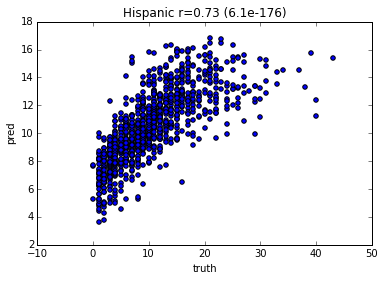

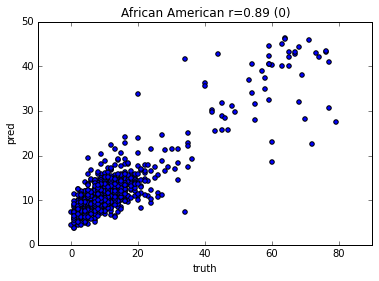

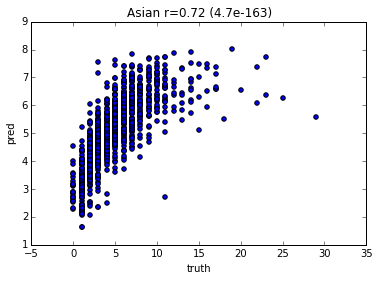

Top Coefficients for Caucasian
pos:1367531 (2.8e+02) 15485441 (2.7e+02) 15846407 (2.7e+02) 14920785 (2.6e+02) 428333 (2.4e+02) 25521487 (2.1e+02) 14075928 (2e+02) 51241574 (2e+02) 16303106 (1.8e+02) 34738598 (1.7e+02)
neg:27195114 (-2.8e+02) 23561980 (-2.6e+02) 18220175 (-2.4e+02) 23151437 (-2.4e+02) 338084918 (-2.4e+02) 117778179 (-2.3e+02) 19028953 (-2.3e+02) 17169320 (-2.2e+02) 25110374 (-2.2e+02) 17929027 (-2.2e+02)
Top Coefficients for Hispanic
pos:16664681 (83) 20346956 (77) 36511031 (74) 1059194370 (69) 14093707 (68) 16374678 (68) 23043294 (66) 18132494 (59) 10252962 (59) 17379685 (59)
neg:1367531 (-1e+02) 14920785 (-99) 15485441 (-96) 428333 (-95) 15846407 (-90) 51241574 (-75) 34738598 (-65) 120943272 (-62) 7744592 (-62) 17074714 (-61)
Top Coefficients for African American
pos:23151437 (2.3e+02) 27195114 (2.1e+02) 18220175 (2e+02) 117778179 (2e+02) 23561980 (2e+02) 25110374 (2e+02) 17169320 (1.9e+02) 19028953 (1.9e+02) 17929027 (1.9e+02) 84358766 (1.9e+02)
neg:15485441 (-1.2e+0

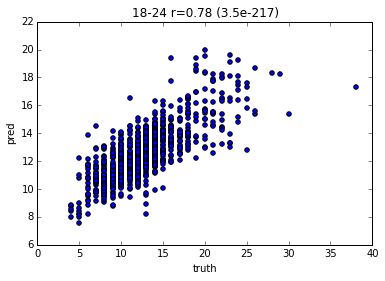

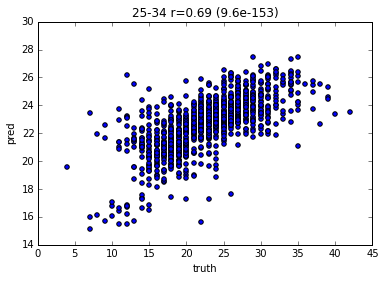

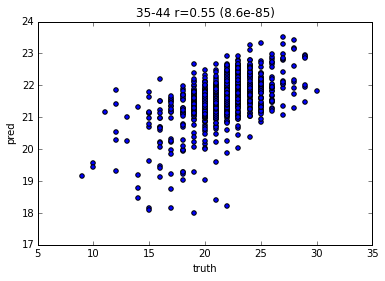

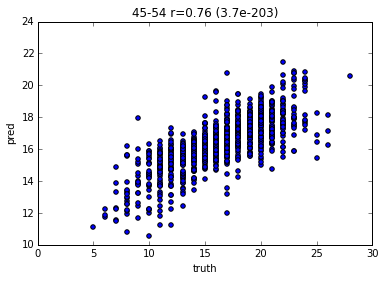

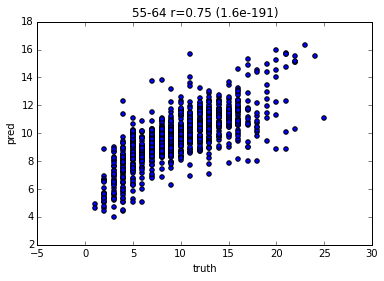

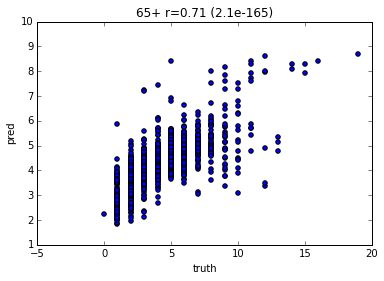

Top Coefficients for 18-24
pos:10671602 (59) 18927441 (57) 29758446 (57) 14922225 (49) 36803580 (48) 24742040 (48) 15234657 (45) 39538010 (41) 10228272 (41) 7157132 (40)
neg:428333 (-78) 51241574 (-68) 1367531 (-68) 3108351 (-61) 30313925 (-58) 2467791 (-54) 28785486 (-52) 759251 (-50) 14173315 (-49) 15012486 (-49)
Top Coefficients for 25-34
pos:6480682 (74) 22027186 (67) 31080039 (60) 23544596 (59) 1344951 (53) 14089195 (51) 169686021 (49) 972651 (48) 16303106 (48) 30364057 (46)
neg:1367531 (-1.2e+02) 428333 (-1e+02) 28785486 (-77) 15012486 (-72) 759251 (-72) 51241574 (-70) 30313925 (-63) 14173315 (-63) 6017542 (-59) 15754281 (-59)
Top Coefficients for 35-44
pos:16331010 (26) 19397785 (20) 813286 (18) 15224867 (17) 428333 (17) 23832022 (16) 19697415 (16) 248900032 (16) 23151437 (16) 58598187 (16)
neg:10671602 (-32) 36803580 (-31) 29758446 (-31) 18927441 (-30) 5162861 (-30) 14922225 (-30) 24742040 (-27) 10228272 (-27) 15234657 (-25) 7157132 (-24)
Top Coefficients for 45-54
pos:428333 (

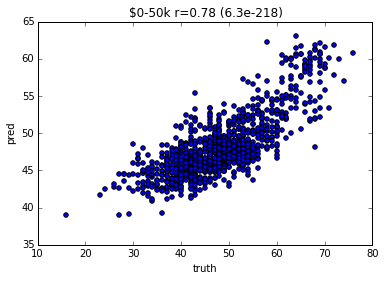

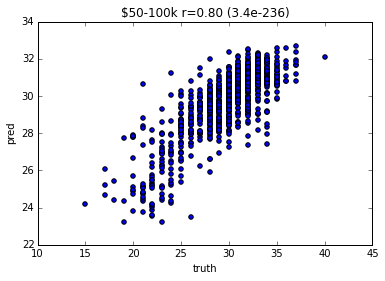

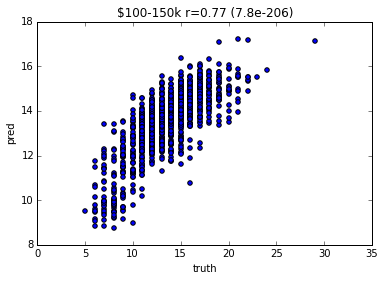

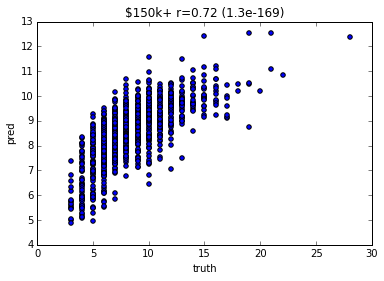

Top Coefficients for $0-50k
pos:10228272 (1.3e+02) 10671602 (1.2e+02) 18927441 (1.1e+02) 29758446 (1.1e+02) 23151437 (93) 24742040 (91) 14922225 (91) 27195114 (89) 15234657 (88) 36803580 (87)
neg:3108351 (-1.8e+02) 807095 (-1.3e+02) 5988062 (-1.2e+02) 2467791 (-1.2e+02) 91478624 (-1.1e+02) 51241574 (-1.1e+02) 34713362 (-1e+02) 51263592 (-98) 428333 (-95) 2557521 (-90)
Top Coefficients for $50-100k
pos:428333 (56) 2557521 (46) 26257166 (44) 51241574 (44) 3108351 (43) 120943272 (43) 15485441 (43) 51263592 (40) 21324258 (40) 807095 (40)
neg:10671602 (-55) 18927441 (-52) 29758446 (-52) 10228272 (-47) 14922225 (-45) 24742040 (-43) 15234657 (-43) 36803580 (-42) 27195114 (-40) 7157132 (-37)
Top Coefficients for $100-150k
pos:3108351 (67) 5988062 (49) 807095 (48) 2467791 (43) 91478624 (43) 34713362 (39) 51241574 (36) 51263592 (36) 14800270 (36) 816653 (34)
neg:10228272 (-45) 10671602 (-37) 18927441 (-34) 29758446 (-33) 23151437 (-32) 27195114 (-29) 24742040 (-28) 21447363 (-28) 14922225 (-28) 

In [33]:
# Do cross-fold validation for different demographics.
from scipy.stats import pearsonr
from sklearn.cross_validation import KFold
from sklearn.feature_selection import f_regression
from sklearn.linear_model import ElasticNet, Lasso, MultiTaskElasticNet, MultiTaskElasticNetCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

feats = npa(vec.get_feature_names())

def plot_scatter(preds, truths, ylabels):
    for yi, ylabel in enumerate(ylabels):
        pr = [p[yi] for p in preds]
        tr = [t[yi] for t in truths]
        plt.figure()
        plt.scatter(tr, pr)
        plt.xlabel('truth')
        plt.ylabel('pred')
        corr = pearsonr(pr, tr)
        plt.title('%s r=%.2f (%.2g)' % (ylabel, corr[0], corr[1]))
        plt.show()
    
def print_top_feats(m, feature_names, labels, n=10):
    for yi, ylabel in enumerate(labels):
        print('Top Coefficients for', ylabel)
        coef = m.coef_[yi]
        srted = np.argsort(coef)
        topi = srted[::-1][:n]
        boti = srted[:n]
        print('pos:' + ' '.join('%s (%.2g)' % (n, c) for n, c in zip(feature_names[topi], coef[topi])))
        print('neg:' + ' '.join('%s (%.2g)' % (n, c) for n, c in zip(feature_names[boti], coef[boti])))

def get_yvalues(ylabels, demo):
    return npa([float(demo[yl][:-1]) for yl in ylabels])

def get_correlations(preds, truths, ylabels):
    results = []
    for i, y in enumerate(ylabels):
        pr = [p[i] for p in preds]
        tr = [t[i] for t in truths]
        results.append(pearsonr(pr, tr)[0])
    return results

correlations = []
category_results = {}
outputs = {'Education': ['No College', 'College', 'Grad School'],
           'Children': ['No Kids', 'Has Kids'],
           'Income': ['$0-50k', '$50-100k', '$100-150k', '$150k+'],
           'Gender': ['Male', 'Female'],
           'Age': ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
           'Ethnicity': ['Caucasian', 'Hispanic', 'African American', 'Asian']}

def get_model():
    # return Ridge(.1)
    # return ElasticNet(alpha=1e-5, l1_ratio=0.5)
    return MultiTaskElasticNet(alpha=1e-5, l1_ratio=0.5)
    
# Labels grouped together for use by MultiTaskElasticNet.
for category, ylabels in outputs.items():
    indices = [i for i, bid in enumerate(brand_ids) if len(set(ylabels) & set(id2brand[bid]['demo'].keys())) == len(ylabels)]
    print('predicting', ylabels, 'for', len(indices), 'brands')
    y = npa([get_yvalues(ylabels, id2brand[brand_ids[bid]]['demo']) for bid in indices])
    thisX = X[indices].toarray()
    cv = KFold(len(y), 5, shuffle=True, random_state=123456)
    preds = []
    truths = []
    for train, test in cv:
        m = get_model()
        m.fit(thisX[train], y[train])
        pred = m.predict(thisX[test])
        preds.extend(pred)
        truths.extend(y[test])
    m = get_model()
    m.fit(thisX, y)
    category_results[category] = {'preds': preds, 'truths': truths, 'model': m}
    plot_scatter(preds, truths, ylabels)
    print_top_feats(m, feats, ylabels)
    correlations.append(np.mean(get_correlations(preds, truths, ylabels)))
print('average correlation=', np.mean(correlations))

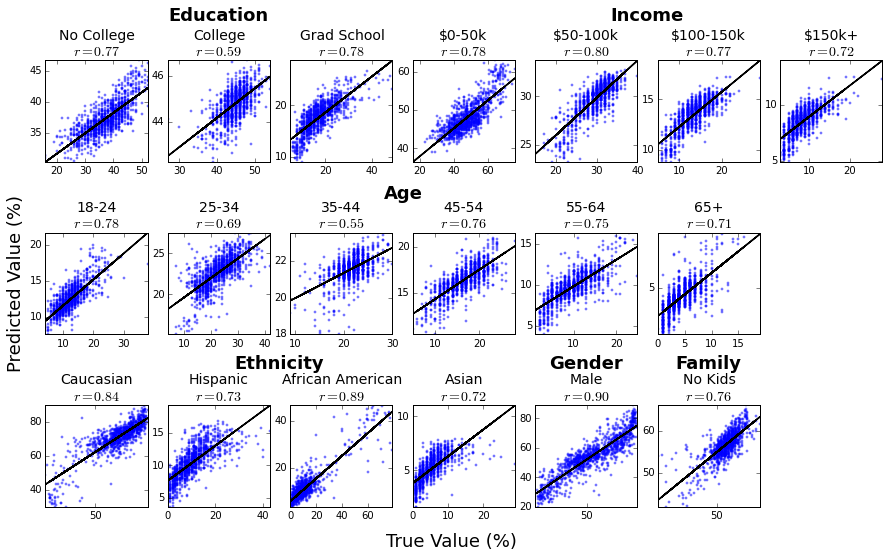

In [34]:
# Plot scatters.
import math
from matplotlib import lines

def nrmsd(truths, preds):
    """ Normalized root mean squared deviation. """
    return rmsd(truths, preds) / (max(truths) - min(truths))

def rmsd(truths, preds):
    """ Normalized root mean squared deviation. """
    return math.sqrt(mean_squared_error(preds, truths))

def plot_scatter_subfig(axis, category, yidx):
    results = category_results[category]
    name = outputs[category][yidx]
    preds = [p[yidx] for p in results['preds']]
    truths = [p[yidx] for p in results['truths']]

    fit = np.polyfit(truths, preds, 1)
    fit_fn = np.poly1d(fit)
    axis.plot(truths, preds, 'o', truths, fit_fn(truths), 'k', linewidth=1.5,
              ms=2, markerfacecolor='None', markeredgecolor='b')
    axis.set_title('%s\n$r=%.2f$' % (name, pearsonr(preds, truths)[0]), size=14)
    axis.locator_params(nbins=4, tight=True) 
    mean = np.mean(truths)
    start, end = axis.get_xlim()
 
def make_scatters_fig():
    figure, axes = plt.subplots(3, 7, figsize=(15,8))
        # Row 1
    plot_scatter_subfig(axes[0][0], 'Education', 0)
    plot_scatter_subfig(axes[0][1], 'Education', 1)
    plot_scatter_subfig(axes[0][2], 'Education', 2)
    plot_scatter_subfig(axes[0][3], 'Income', 0)
    plot_scatter_subfig(axes[0][4], 'Income', 1)
    plot_scatter_subfig(axes[0][5], 'Income', 2)
    plot_scatter_subfig(axes[0][6], 'Income', 3)
    # Row 2
    for i in range(6):
        plot_scatter_subfig(axes[1][i], 'Age', i)        
    # Row 3
    for i in range(4):
        plot_scatter_subfig(axes[2][i], 'Ethnicity', i)        
    plot_scatter_subfig(axes[2][4], 'Gender', 0)        
    plot_scatter_subfig(axes[2][5], 'Children', 0)    
    # Now add titles.
    axes[1, 6].axis('off')
    axes[2, 6].axis('off')
    axes[0, 1].text(.5, 1.35, 'Education',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[0, 1].transAxes)
    axes[0, 4].text(1.1, 1.35, 'Income',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[0, 4].transAxes)
    axes[1, 2].text(1.1, 1.3, 'Age',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[1, 2].transAxes)
    axes[2, 1].text(1.1, 1.32, 'Ethnicity',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[2, 1].transAxes)
    axes[2, 4].text(.5, 1.32, 'Gender',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[2, 4].transAxes)
    axes[2, 5].text(.5, 1.32, 'Family',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[2, 5].transAxes)

    axes[1][0].set_ylabel('Predicted Value (%)', size=18)
    plt.subplots_adjust(hspace=.7)   
    plt.figtext(0.5,.08,"True Value (%)",fontdict={'fontsize':18}, verticalalignment='top', horizontalalignment='center')
    plt.savefig('scatters.pdf', bbox_inches='tight')

make_scatters_fig()

In [ ]:
# Print the top features.
from collections import defaultdict
from twutil import collect

def get_top_user_ids():
    id_list = []
    top_user_ids = defaultdict(lambda: defaultdict(lambda: []))
    for category in category_results:
        results = category_results[category]
        coef = results['model'].coef_
        for yi, ylabel in enumerate(outputs[category]):
            topi = np.argsort(coef[yi])[::-1][:5]
            print(category, ylabel, ' '.join('%d' % x for x in feats[topi]))
            id_list.extend(feats[topi])
            top_user_ids[category][ylabel] = feats[topi]
    return top_user_ids, id_list

def get_top_user_names():
    top_user_ids, id_list = get_top_user_ids()
    user_names = collect.lookup_handles(id_list)
    id2user = dict([(int(x[1]), x[0]) for x in user_names])
    for category in top_user_ids:
        for label in top_user_ids[category]:
            top_user_ids[category][label] = [id2user[x] for x in top_user_ids[category][label] if x in id2user]
    return top_user_ids

top_users = get_top_user_names()

In [16]:
import re

def list2row(mylist, fmt='%s'):
    return ' & '.join([fmt % i for i in mylist])

def verb(s, delim=';'):
    return '\\verb' + delim + s + delim

def clean(s):
    return re.sub('_', '\\_', re.sub('\$', '\\$', s))

def make_user_table(top_users):
    outf = open('users.tex', 'wt')
    outf.write('\\begin{table*}[t]\n\\centering\n\\begin{tabular}{|c|c|l|}\n\\hline\n')
    outf.write(list2row(['{\\bf Category}', '{\\bf Value}', '{\\bf Top Accounts}']) +
                   '\\\\\n\\hline\n')
    for ci, category in enumerate(outputs):
        for li, label in enumerate(outputs[category]):
            row = [''] * 3
            row[0] = category if li == 0 else ''
            row[1] = clean(label)
            row[2] = ', '.join(clean(x) for x in top_users[category][label])
            outf.write(list2row(row) + '\\\\\n')
        outf.write('\\hline\n')
    outf.write('\\end{tabular}\\caption{Accounts with the highest estimated coefficients for each category.\\label{tab.users}}\n\\end{table*}\n')

make_user_table(top_users)
    

In [17]:
!cat users.tex

\begin{table*}[t]
\centering
\begin{tabular}{|c|c|l|}
\hline
{\bf Category} & {\bf Value} & {\bf Top Accounts}\\
\hline
Gender & Male & AdamSchefter, SportsCenter, espn, WIRED, mortreport\\
 & Female & TheEllenShow, Oprah, MarthaStewart, Pinterest, FoodNetwork\\
\hline
Age & 18-24 & PlayStation, IGN, RockstarGames, Ubisoft, steam\_games\\
 & 25-34 & azizansari, lenadunham, mindykaling, WIRED\\
 & 35-44 & TMZ, Oprah, BarackObama, andersoncooper, cnnbrk\\
 & 45-54 & cnnbrk, FoxNews, AP, CNN, ABC\\
 & 55-64 & FoxNews, cnnbrk, AP, WSJ, WhiteHouse\\
 & 65+ & FoxNews, cnnbrk, WSJ, AP, DRUDGE\_REPORT\\
\hline
Income & \$0-50k & YouTube, PlayStation, IGN, RockstarGames, KevinHart4real\\
 & \$50-100k & cnnbrk, espn, SportsCenter, AP, WSJ\\
 & \$100-150k & WSJ, TheEconomist, nytimes, washingtonpost, Forbes\\
 & \$150k+ & WSJ, TheEconomist, nytimes, Forbes, business\\
\hline
Education & No College & YouTube, PlayStation, RockstarGames, katyperry, KevinHart4real\\
 & College & ConanOBrien, danielt

**Comparison with supervised learning (logistic regression)**

We manually labeled individual Twitter users with race/gender to compare accuracy of the model trained above. For comparison, we also train a supervised logistic regression classifier, which uses the same feature vector as our model.

Because the labeled data contains personally identifiable information, we have elected not to share it publicly. Please contact the authors to discuss possible data sharing agreements.

In [39]:
# Compute accuracy on users labeled by race.
from collections import Counter
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.utils.extmath import safe_sparse_dot

def train_demo_model(ylabels):
    indices = [i for i, bid in enumerate(brand_ids) if len(set(ylabels) & set(id2brand[bid]['demo'].keys())) == len(ylabels)]
    print('training race model on', len(indices), 'brands')
    y = npa([get_yvalues(ylabels, id2brand[brand_ids[bid]]['demo']) for bid in indices])
    thisX = X[indices].toarray()
    m = get_model()
    m.fit(thisX, scale(y))
    m.coef_ = m.coef_[0:3]
    return m

def map_race_label(label):
    return ['white', 'latin', 'black', 'asian'].index(label)
    
def read_labeled_data(fname, label_map_f):
    users = []
    labels = []
    friends = []
    for line in open(fname):
        parts = line.strip().split()
        if len(parts) > 10:
            users.append(parts[0])
            labels.append(label_map_f(parts[1]))
            friends.append(Counter([int(x) for x in parts[2:]]))
    X_race = vec.transform(friends)
    return users, npa(labels), X_race

def label_by_reg(X_race, m):
    """ Scale coefficients per class to make them comparable;
    then keep only positive coefficients. """
    coef = m.coef_
    coef = scale(m.coef_, axis=0)  # Scale by class label
    for i in range(len(coef)):
        topi = np.where(coef[i] > 0)
        topv = coef[i][topi]
        coef[i] = [0] * len(coef[i])
        coef[i][topi] = topv
    pred = safe_sparse_dot(coef, X_race.T, dense_output=True).T
    return np.argmax(pred, axis=1)

def label_by_clf(X_race, y_race, pct):
    clf = LogisticRegression()
    cv = KFold(len(y_race), 3, shuffle=True, random_state=123456)
    preds = np.zeros(len(y_race), int)
    for train, test in cv:
        train = random.sample(set(train), int(len(train) * pct))
        clf.fit(X_race[train], y_race[train])
        preds[test] = clf.predict(X_race[test])
    return preds

def eval_labeled(truth, pred, labels):
    label_idx = np.arange(len(labels))
    acc, f1 = (accuracy_score(pred, truth),
                       f1_score(truth, pred, labels=label_idx,
                                average='macro', pos_label=None))
    print('acc=', acc, 'f1=', f1)
    print(confusion_matrix(truth, pred))
    return f1

    
def do_race_expt():
    labels = ['Caucasian', 'Hispanic', 'African American', 'Asian']
    users_race, y_race, X_race = read_labeled_data('../data/race.txt', map_race_label)
    X_race = X_race[np.where(y_race != 3)]
    y_race = y_race[np.where(y_race != 3)]
    print('X_race shape=', str(X_race.get_shape()), 'total matches=', X_race.sum())
    labels = labels[0:3]
    reg = train_demo_model(labels)
    pred_reg = label_by_reg(X_race, reg)
    reg_f1 = eval_labeled(y_race, pred_reg, labels)
    clf_f1s = []
    for pct in [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]:
        pred_clf = label_by_clf(X_race, y_race, pct)
        clf_f1s.append(eval_labeled(y_race, pred_clf, labels))
    return reg_f1, clf_f1s

race_results = do_race_expt()

X_race shape= (615, 46649) total matches= 17366.0
training race model on 1035 brands
acc= 0.614634146341 f1= 0.609443159441
[[128 108  29]
 [ 34  86   9]
 [ 36  21 164]]
acc= 0.544715447154 f1= 0.449208508549
[[209   6  50]
 [ 88  13  28]
 [106   2 113]]
acc= 0.582113821138 f1= 0.547361314201
[[172  25  68]
 [ 59  41  29]
 [ 70   6 145]]
acc= 0.634146341463 f1= 0.563982946188
[[237   3  25]
 [ 82  29  18]
 [ 94   3 124]]
acc= 0.658536585366 f1= 0.587987412216
[[233   5  27]
 [ 78  30  21]
 [ 75   4 142]]
acc= 0.671544715447 f1= 0.636219535313
[[215  12  38]
 [ 63  49  17]
 [ 67   5 149]]
acc= 0.673170731707 f1= 0.632460829646
[[237   6  22]
 [ 74  46   9]
 [ 86   4 131]]
acc= 0.692682926829 f1= 0.646355937889
[[224   6  35]
 [ 63  45  21]
 [ 56   8 157]]
acc= 0.70243902439 f1= 0.662444780879
[[233  11  21]
 [ 67  49  13]
 [ 68   3 150]]
acc= 0.705691056911 f1= 0.668858591958
[[226   9  30]
 [ 65  51  13]
 [ 59   5 157]]
acc= 0.713821138211 f1= 0.682798607784
[[225  10  30]
 [ 59  56  1

In [40]:
# Compute accuracy on data labeled by gender.
def map_gender_label(label):
    return ['Male', 'Female'].index(label)

def do_gender_expt():
    labels = ['Male', 'Female']
    users_gender, y_gender, X_gender = read_labeled_data('../data/gender.txt', map_gender_label)
    print('X_gender shape=', str(X_gender.get_shape()), 'total matches=', X_gender.sum())
    
    reg = train_demo_model(labels)
    pred_reg = label_by_reg(X_gender, reg)
    reg_f1 = eval_labeled(y_gender, pred_reg, labels)
    clf_f1s = []
    for pct in [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]:
        pred_clf = label_by_clf(X_gender, y_gender, pct)
        clf_f1s.append(eval_labeled(y_gender, pred_clf, labels))
    return reg_f1, clf_f1s
    
gender_results = do_gender_expt()

X_gender shape= (213, 46649) total matches= 7516.0
training race model on 1066 brands
acc= 0.741784037559 f1= 0.741784037559
[[79  7]
 [48 79]]
acc= 0.643192488263 f1= 0.489015151515
[[ 10  76]
 [  0 127]]
acc= 0.68544600939 f1= 0.654229157076
[[ 41  45]
 [ 22 105]]
acc= 0.676056338028 f1= 0.634266517357
[[ 36  50]
 [ 19 108]]
acc= 0.661971830986 f1= 0.529570552147
[[ 14  72]
 [  0 127]]
acc= 0.732394366197 f1= 0.671020186967
[[ 32  54]
 [  3 124]]
acc= 0.699530516432 f1= 0.61237488626
[[ 24  62]
 [  2 125]]
acc= 0.704225352113 f1= 0.620599960417
[[ 25  61]
 [  2 125]]
acc= 0.741784037559 f1= 0.688637873754
[[ 35  51]
 [  4 123]]
acc= 0.741784037559 f1= 0.691491322782
[[ 36  50]
 [  5 122]]
acc= 0.741784037559 f1= 0.68566368832
[[ 34  52]
 [  3 124]]


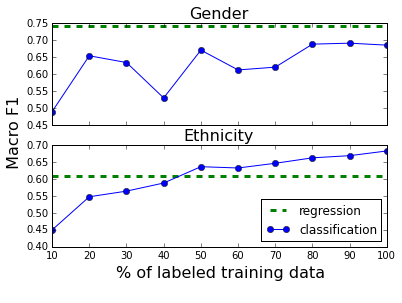

In [41]:
def plot_labeled_results(reg_results, clf_results, xticks, axis, title):
    axis.plot(xticks, [reg_results] * len(clf_results), 'g--', label='regression', lw=3)
    axis.plot(xticks, clf_results, 'bo-', label='classification')
    axis.set_title(title, size=16)
    
def make_labeled_plot(gender_results, race_results):
    xticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    figure, axes = plt.subplots(2, 1, sharex=True)
    plot_labeled_results(gender_results[0], gender_results[1], xticks, axes[0], 'Gender')
    plot_labeled_results(race_results[0], race_results[1], xticks, axes[1], 'Ethnicity')
    axes[1].set_ylabel((' ' * 25) + 'Macro F1', size=16)
    axes[1].set_xlabel('% of labeled training data', size=16)
    axes[1].legend(loc='lower right')
    plt.savefig('labeled.pdf', bbox_inches='tight')

    
make_labeled_plot(gender_results, race_results)

training race model on 1035 brands
acc= 0.549593495935 f1= 0.505811358585
[[208  41  16]
 [ 79  42   8]
 [115  18  88]]
acc= 0.484552845528 f1= 0.432301583071
[[195  40  30]
 [ 83  34  12]
 [129  23  69]]
acc= 0.526829268293 f1= 0.477198788156
[[208  37  20]
 [ 83  38   8]
 [127  16  78]]
acc= 0.526829268293 f1= 0.480685138828
[[205  37  23]
 [ 80  40   9]
 [125  17  79]]
acc= 0.551219512195 f1= 0.512479320936
[[207  40  18]
 [ 73  47   9]
 [119  17  85]]
acc= 0.569105691057 f1= 0.548909157785
[[175  52  38]
 [ 62  57  10]
 [ 78  25 118]]
acc= 0.551219512195 f1= 0.533941429648
[[169  68  28]
 [ 65  57   7]
 [ 83  25 113]]
acc= 0.551219512195 f1= 0.523876394573
[[182  57  26]
 [ 68  50  11]
 [ 88  26 107]]
acc= 0.588617886179 f1= 0.562933681604
[[182  55  28]
 [ 62  54  13]
 [ 70  25 126]]
acc= 0.565853658537 f1= 0.54267031674
[[186  53  26]
 [ 60  58  11]
 [ 90  27 104]]
acc= 0.580487804878 f1= 0.573140254929
[[156  84  25]
 [ 50  72   7]
 [ 66  26 129]]
acc= 0.556097560976 f1= 0.54924

/usr/lib64/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


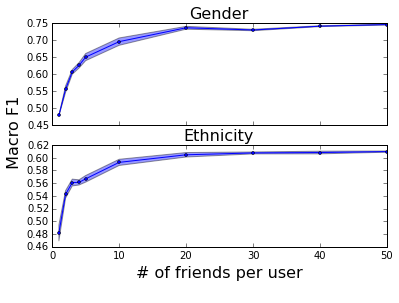

In [42]:
# Plot F1 as the number of friends per user increases.
import random

def sample_friends(X, n):
    X_sample = X.copy()
    for i, xi in enumerate(X_sample):
        nnz = xi.getnnz()
        if n < nnz:
            nzcols = xi.nonzero()[1]
            indices = random.sample(range(nnz), nnz - n)
            X_sample[i, nzcols[indices]] = 0.
            X_sample.eliminate_zeros()
    return X_sample

def _do_nfriends_expt(XX, y, m, labels):
    ys = []
    stderrs = []
    xs = [1,2,3,4,5,10,20,30,40,50]  # range(1, 50)[::5]  # [::50]
    for nfriends in xs:
        f1s = []
        for sample in range(5):
            X_sample = sample_friends(XX, nfriends)
            pred_reg = label_by_reg(X_sample, m)
            reg_f1 = eval_labeled(y, pred_reg, labels)
            f1s.append(reg_f1)
        ys.append(np.mean(f1s))
        stderrs.append(np.std(f1s) / math.sqrt(len(f1s)))
    return npa(xs), npa(ys), npa(stderrs)

def do_nfriends_expt():
    random.seed(1234)
    labels = ['Caucasian', 'Hispanic', 'African American', 'Asian']
    users_race, y_race, X_race = read_labeled_data('../data/race.txt', map_race_label)
    labels = labels[:3]
    m = train_demo_model(labels)
    xs_r, ys_r, stderrs_r = _do_nfriends_expt(X_race, y_race, m, labels)

    labels = ['Male', 'Female']
    users_race, y_gender, X_gender = read_labeled_data('../data/gender.txt', map_gender_label)
    m = train_demo_model(labels)
    xs_g, ys_g, stderrs_g = _do_nfriends_expt(X_gender, y_gender, m, labels)
    
    figure, axes = plt.subplots(2, 1, sharex=True)
    axes[0].plot(xs_g, ys_g, 'bo-', ms=3)
    axes[0].fill_between(xs_g, ys_g - stderrs_g, ys_g + stderrs_g, alpha=0.4, facecolor='b')
    axes[0].set_title('Gender', size=16)
    axes[1].plot(xs_r, ys_r, 'bo-', ms=3)
    axes[1].fill_between(xs_r, ys_r - stderrs_r, ys_r + stderrs_r, alpha=0.4, facecolor='b')
    axes[1].set_title('Ethnicity', size=16)
    
    axes[1].set_xlabel('# of friends per user', size=16)
    axes[1].set_ylabel((' ' * 25) + 'Macro F1', size=16)
    axes[1].legend(loc='lower right')
    plt.savefig('friends.pdf', bbox_inches='tight')

do_nfriends_expt()